In [18]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')
# loading two main library and the database

In [19]:
data.replace('?', np.nan, inplace=True)
data = data.astype({"age": np.float64, "fare":np.float64})
# replace all "?" for "nan" on those two columns age and fare

<AxesSubplot:xlabel='survived', ylabel='fare'>

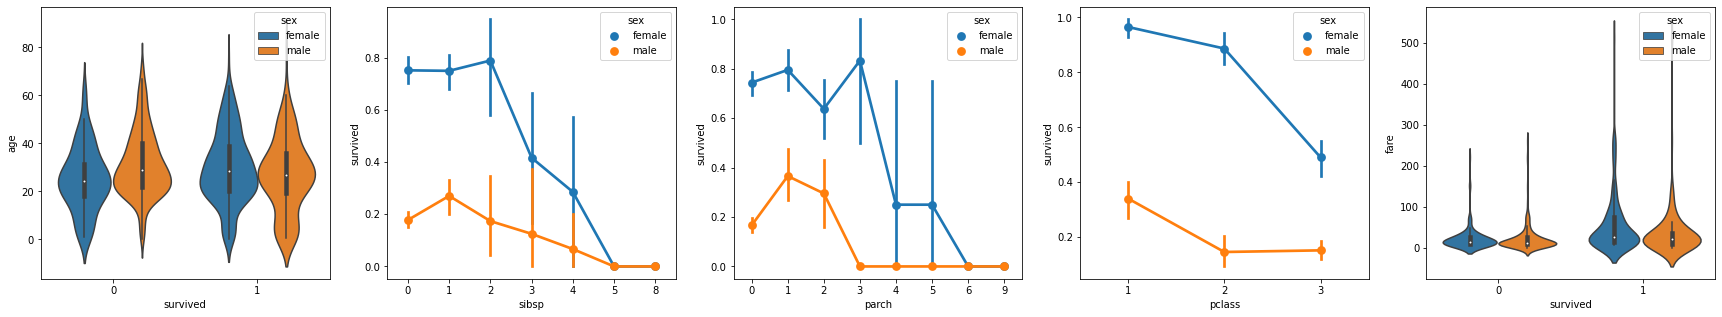

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

fig,axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

# plot some graphs

In [21]:
data.replace({"male": 1, "female": 0}, inplace=True)
# to calculate correlations using panda, we need integer "0 and 1", not string "male and female"

In [22]:
data.corr().abs()[["survived"]]
# with this we can see each column and correlation to the "survived" the closest to 1 is better to use

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


In [23]:
data["relatives"] = data.apply (lambda row: int((row["sibsp"] + row["parch"]) > 0), axis=1)
data.corr().abs()[["survived"]]

# putting together two columns "sibsp and parch" to make a new column "relative" and see if the correlation with one or other is better

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


In [24]:
data = data[["sex","pclass","age","relatives","fare","survived"]].dropna()
# now we can create a new dataset with only columns that have good correlations, also remove columns with "nan"
# we kept age because it might interfer with other inputs

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[["sex","pclass","age","relatives","fare"]], data.survived, test_size=0.2, random_state=0)
# we divide our data set in 2, 80% will be our training and 20% is our validation

In [26]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

# with this we are ensuring that all variables have the same value, age from range 0 - 100 is the same gender 1 or 0

In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
# has to choose the best ML algorithm that can model the data, for this situation "naive bayes algorithm" works well

GaussianNB()

In [28]:
from sklearn import metrics
predict_test = model.predict(X_test)
print (metrics.accuracy_score(y_test, predict_test))

# with this we can see that our trained algorithm had a 75$ success rate at estimating survival

0.7464114832535885


In [ ]:
# --------------------------------------------------------------------------------------------------------------
# ------------------------------------------------------------------------------------------------------------

In [29]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

# this and the following step is to find a the model using a neural network to increase the accuracy

In [30]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# The first layer will be set to have a dimension of 5, since you have 5 inputs: sex, pclass, age, relatives, and fare.
# The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
# The middle layer was kept at 5 for simplicity, although that value could have been different.

# this is to create the layers of neural network

In [31]:
model.summary()
# look the summary of the model we are creating

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 5)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 30        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

# creating the model

Epoch 1/50
27/27 [==============================] - 0s 631us/step - loss: 0.6923 - accuracy: 0.5622
Epoch 2/50
27/27 [==============================] - 0s 587us/step - loss: 0.6900 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 592us/step - loss: 0.6857 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 592us/step - loss: 0.6771 - accuracy: 0.5861
Epoch 5/50
27/27 [==============================] - 0s 517us/step - loss: 0.6622 - accuracy: 0.5861
Epoch 6/50
27/27 [==============================] - 0s 495us/step - loss: 0.6430 - accuracy: 0.5861
Epoch 7/50
27/27 [==============================] - 0s 480us/step - loss: 0.6239 - accuracy: 0.5861
Epoch 8/50
27/27 [==============================] - 0s 517us/step - loss: 0.6065 - accuracy: 0.5861
Epoch 9/50
27/27 [==============================] - 0s 480us/step - loss: 0.5943 - accuracy: 0.5861
Epoch 10/50
27/27 [==============================] - 0s 544us/step - loss: 0.5844 - accuracy: 0.5861

In [33]:
y_pred = model.predict_classes(X_test)
print(metrics.accuracy_score(y_test, y_pred))

# with the model built and trained, we can find the new accuracy

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
0.8038277511961722
